In [1]:
#------------------------------------------------------------------------------ 
# import packages
#------------------------------------------------------------------------------
import numpy as np
import pandas as pd

from xgboost import plot_importance
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import visualization

visualize mod is imported into another module


In [3]:
# model parameters

path_to_file = '../data/params/'
npyfile_name = path_to_file + '1.0-akr-idealdonor-XGB-20220201-params.npy'
adict = np.load(npyfile_name, allow_pickle=True).item()

adict

{'colsample_bytree': 0.5578449911612051,
 'gamma': 0.0008981539507443201,
 'lambda': 0.3768999605537648,
 'max_depth': 3,
 'min_child_weight': 28.979043359243857,
 'scale_pos_weight': 70.98163669128577,
 'subsample': 0.8245121320246058,
 'num_boost_round': 46,
 'booster': 'gbtree',
 'objective': 'binary:logistic',
 'eta': 0.001,
 'seed': 0,
 'verbosity': 1,
 'alpha': 0,
 'eval_metric': ['aucpr']}

In [4]:
# feature names
path_to_file = '../data/params/'
col_name = path_to_file + '1.0-akr-idealdonor-XGB-20220201-colnames.pkl'

colnames_dict = np.load(col_name, allow_pickle=True)
colnames_dict

{'f0': 'primaryPropertyValue',
 'f1': 'propertyCount',
 'f2': 'NetWorth',
 'f3': 'primaryPropertyLoanToValue_ideal',
 'f4': 'primaryPropertyValueToNetWorth_ratio',
 'f5': 'LoanAmount',
 'f6': 'amount_prev360d2',
 'f7': 'amount_prev360d3',
 'f8': 'amount_prev360d4',
 'f9': 'amount_prev360d5',
 'f10': 'count_trans_date_prev5y',
 'f11': 'random_value',
 'f12': 'amountscaled_prev360d3',
 'f13': 'amountscaled_prev360d5'}

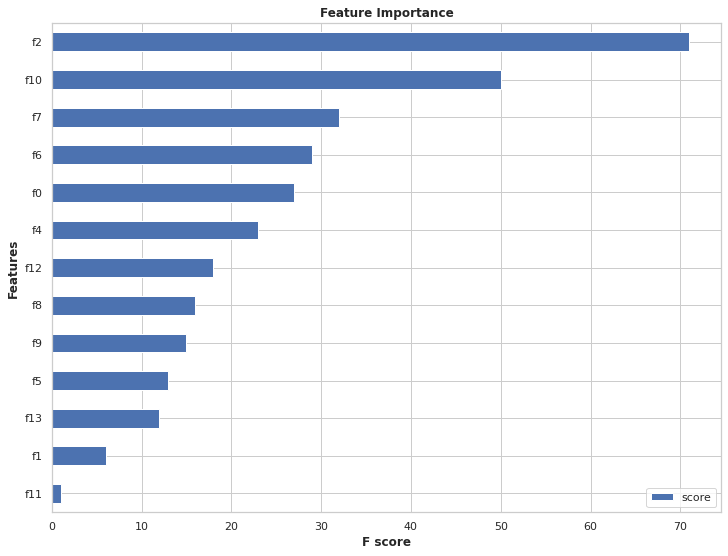

In [5]:
# feature importance

model_name = '../models/1.0-akr-idealdonor-XGB-20220201-model.pickle.dat'
fitted_model = pickle.load(open(model_name, "rb"))

# ‘weight’ - the number of times a feature is used to split the data across all trees
# ‘gain’ - the average gain across all splits the feature is used in

feature_important = fitted_model.get_score(importance_type='weight') #'gain'
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh', figsize = (12,9));
plt.xlabel('F score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance', fontsize=12, fontweight='bold')
plt.show();

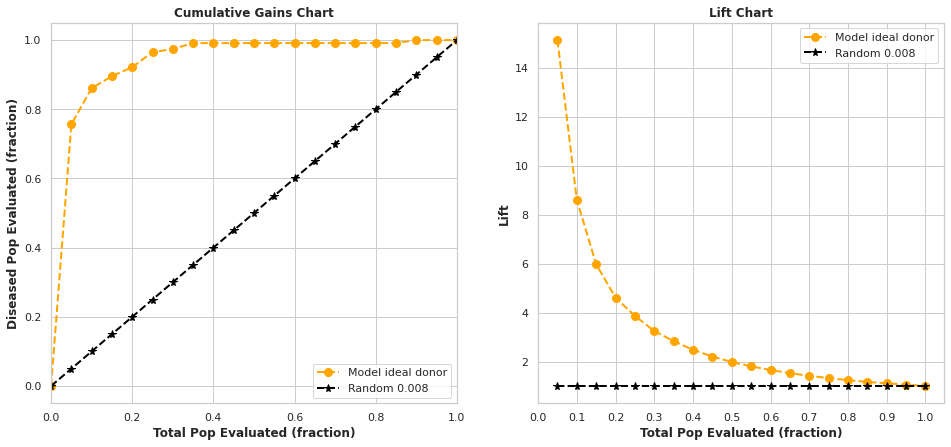

In [4]:
# cumulative gains and lift

# load data
path_to_file = '../data/predictions/'
file_name = path_to_file + '1.0-akr-idealdonor-XGB-20220201-prediction.csv'

# print cumulative gains and lift
label = 'Model ideal donor'
random = 0.008

pct_to_pick, tpr_decile, k_realPOS, k_total = visualization.plot_cumgains_lift(file_name, label=label, random=random, color='orange')

In [5]:
# lift at "decile"
tpr_decile / pct_to_pick

array([15.13043478,  8.60869565,  5.97101449,  4.60869565,  3.86086957,
        3.24637681,  2.83229814,  2.47826087,  2.20289855,  1.9826087 ,
        1.80237154,  1.65217391,  1.52508361,  1.41614907,  1.32173913,
        1.23913043,  1.16624041,  1.11111111,  1.05263158,  1.        ])

In [6]:
# total target evaluated at "decile"
tpr_decile*k_realPOS

array([ 87.,  99., 103., 106., 111., 112., 114., 114., 114., 114., 114.,
       114., 114., 114., 114., 114., 114., 115., 115., 115.])

In [7]:
# total population evaluated at "decile"
pct_to_pick*k_total

array([  759.15,  1518.3 ,  2277.45,  3036.6 ,  3795.75,  4554.9 ,
        5314.05,  6073.2 ,  6832.35,  7591.5 ,  8350.65,  9109.8 ,
        9868.95, 10628.1 , 11387.25, 12146.4 , 12905.55, 13664.7 ,
       14423.85, 15183.  ])

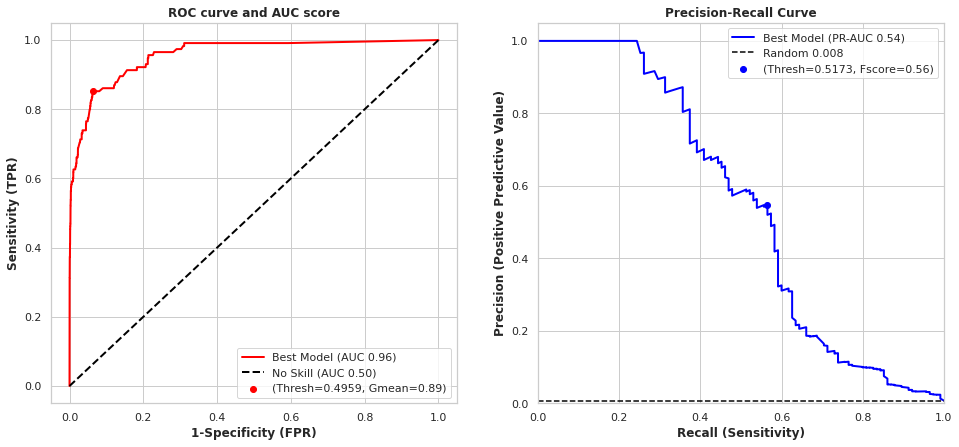

In [8]:
# auc roc and auc pr

# load data
path_to_file = '../data/predictions/'
file_name = path_to_file + '1.0-akr-idealdonor-XGB-20220201-prediction.csv'
visualization.plot_aucroc_aucpr(file_name)

In [16]:
# confusion matrix set to idea threshold as determined by f1 score. 

# load data  and model
path_to_file = '../data/predictions/'
file_name = path_to_file + '1.0-akr-idealdonor-XGB-20220201-prediction.csv'

path_to_model = '../models/'
model_name = path_to_model + '1.0-akr-idealdonor-XGB-20220201-model.pickle.dat'
thresh = 0.5173

visualization.get_confusion_matrix(file_name, model_name, thresh)

Threshold      : 0.52
Actual Positives    = 115  Actual Negatives    = 15068
Predicted Positives = 119  Predicted Negatives = 15064
precision                      : 0.55
sensitivity (TPR)              : 0.57
specificity (TNR)              : 1.00
chance                         : 0.01
 
model :  if 119 are contacted, 65 are found
chance:  if 119 are contacted, 0 are found 



,Predicted: Negative,Predicted: Positive
Actual: Negative,15014,54
Actual: Positive,50,65


In [17]:
predictions = pd.read_csv('../data/predictions/1.0-akr-idealdonor-XGB-20220201-prediction.csv')
predictions = pd.read_csv('../data/predictions/1.0-akr-idealdonor-XGB-20220201-prediction.csv')

In [11]:
predictions.describe()

,Ytrue,Ypred
count,15183.000000,15183.000000
mean,0.007574,0.482756
std,0.086703,0.007200
min,0.000000,0.478859
25%,0.000000,0.478866
50%,0.000000,0.479820
75%,0.000000,0.481708
max,1.000000,0.521697


ideal: 115
non-ideal: 15068


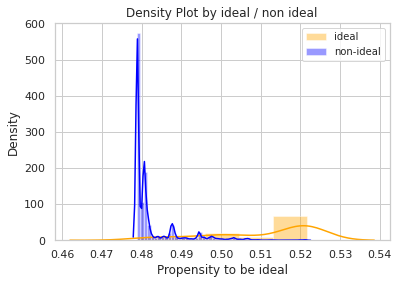

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

fig, ax = plt.subplots()

predictions_target = predictions[predictions['Ytrue']==1]
print('ideal:', predictions_target.shape[0])
sns.distplot(predictions_target['Ypred'].values, color='orange', label = ('ideal'), ax=ax)

predictions_nontarget = predictions[predictions['Ytrue']==0]
print('non-ideal:', predictions_nontarget.shape[0])
sns.distplot(predictions_nontarget['Ypred'].values, color='blue', label = ('non-ideal'), ax=ax)

plt.legend(prop={'size': 10})
plt.title('Density Plot by ideal / non ideal')
plt.xlabel('Propensity to be ideal')
plt.ylabel('Density')
##plt.xlim([0, .001])
##plt.ylim([0, 7])

plt.show();

In [13]:
# predictions by Class donor

path_to_file = '../data/raw/'
df_features = pd.read_csv(path_to_file + 'windfall_features.csv')
df_featuresbyclass = df_features[['candidate_id','isClassADonor','isClassBDonor', 'isClassCDonor', 'isClassDDonor']]
predictionsbyclass = predictions.set_index('ID').join(df_featuresbyclass.set_index('candidate_id'), how='left').reset_index()

In [14]:
# C and D share 52 candidates
SizeClassCD = predictionsbyclass[(predictionsbyclass['Ytrue']==1) & (predictionsbyclass['isClassDDonor']==1) & (predictionsbyclass['isClassCDonor']==1)].sort_values('ID').shape[0]
print('C and D share {} candidates'.format(SizeClassCD))

C and D share 52 candidates


predictions_targetA: 0
predictions_targetB: 71
predictions_targetC: 72
predictions_targetD: 72


/home/dsvm_aleport/.conda/envs/py38_aleport/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


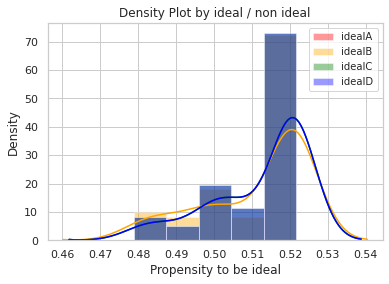

In [15]:
# Zero predictive power for Class A
# B, C and D are essentially the same distribution and can therefore be considered one big group.


fig, ax = plt.subplots()

predictions_targetA = predictionsbyclass[(predictionsbyclass['Ytrue']==1) & (predictionsbyclass['isClassADonor']==1)]
print('predictions_targetA:', predictions_targetA.shape[0])
sns.distplot(predictions_targetA['Ypred'].values, color='red', label = ('idealA'), ax=ax)

predictions_targetB = predictionsbyclass[(predictionsbyclass['Ytrue']==1) & (predictionsbyclass['isClassBDonor']==1)]
print('predictions_targetB:', predictions_targetB.shape[0])
sns.distplot(predictions_targetB['Ypred'].values, color='orange', label = ('idealB'), ax=ax)

predictions_targetC = predictionsbyclass[(predictionsbyclass['Ytrue']==1) & (predictionsbyclass['isClassCDonor']==1)]
print('predictions_targetC:', predictions_targetC.shape[0])
sns.distplot(predictions_targetC['Ypred'].values, color='green', label = ('idealC'), ax=ax)

predictions_targetD = predictionsbyclass[(predictionsbyclass['Ytrue']==1) & (predictionsbyclass['isClassCDonor']==1)]
print('predictions_targetD:', predictions_targetD.shape[0])
sns.distplot(predictions_targetD['Ypred'].values, color='blue', label = ('idealD'), ax=ax)

#predictions_nontarget = predictions[predictions['Ytrue']==0]
#print('non-ideal:', predictions_nontarget.shape[0])
#sns.distplot(predictions_nontarget['Ypred'].values, color='blue', label = ('non-ideal'), ax=ax)

plt.legend(prop={'size': 10})
plt.title('Density Plot by ideal / non ideal')
plt.xlabel('Propensity to be ideal')
plt.ylabel('Density')
##plt.xlim([0, .001])
##plt.ylim([0, 7])

plt.show();